# Machine Learning

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

## Setup

In [ ]:
df_bp = pd.read_csv("oscars_final.csv")

df_bp = df_bp.drop(columns=["Unnamed: 0"])
df_bp.dropna(subset=["imdb_rating", "rt_critic", "rt_audience"], inplace=True)
df_bp.reset_index(drop=True, inplace=True)

df_oscars_data = df_bp[:-10]
df_oscars_data

,year_film,year_ceremony,ceremony,category,name,film,winner,total_noms,runtime,director,...,gg_drama_nom,gg_drama_win,gg_comedy_nom,gg_comedy_win,rt_critic,rt_audience,pga_nom,pga_win,ccma_nom,ccma_win
0,1927,1928,1,OUTSTANDING PICTURE,Fox,7th Heaven,False,5.0,110,Frank Borzage,...,0.0,0.0,0.0,0.0,100.0,84.0,0.0,0.0,0.0,0.0
1,1927,1928,1,OUTSTANDING PICTURE,The Caddo Company,The Racket,False,1.0,84,Lewis Milestone,...,0.0,0.0,0.0,0.0,100.0,69.0,0.0,0.0,0.0,0.0
2,1927,1928,1,OUTSTANDING PICTURE,Paramount Famous Lasky,Wings,True,2.0,144,"William A. Wellman, Harry d'Abbadie d'Arrast",...,0.0,0.0,0.0,0.0,94.0,79.0,0.0,0.0,0.0,0.0
3,1928,1929,2,OUTSTANDING PICTURE,Fox,In Old Arizona,False,4.0,95,"Irving Cummings, Raoul Walsh",...,0.0,0.0,0.0,0.0,56.0,35.0,0.0,0.0,0.0,0.0
4,1928,1929,2,OUTSTANDING PICTURE,Feature Productions,Alibi,False,2.0,91,Roland West,...,0.0,0.0,0.0,0.0,56.0,35.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,2022,2023,95,BEST PICTURE,"Daniel Kwan, Daniel Scheinert and Jonathan Wan...",Everything Everywhere All at Once,True,11.0,139,"Daniel Kwan, Daniel Scheinert",...,0.0,0.0,1.0,0.0,94.0,86.0,1.0,1.0,1.0,1.0
581,2022,2023,95,BEST PICTURE,"Todd Field, Alexandra Milchan and Scott Lamber...",Tár,False,6.0,158,Todd Field,...,1.0,0.0,0.0,0.0,91.0,74.0,1.0,0.0,1.0,0.0
582,2022,2023,95,BEST PICTURE,"Tom Cruise, Christopher McQuarrie, David Ellis...",Top Gun: Maverick,False,6.0,130,Joseph Kosinski,...,1.0,0.0,0.0,0.0,96.0,99.0,1.0,0.0,1.0,0.0
583,2022,2023,95,BEST PICTURE,"Dede Gardner, Jeremy Kleiner and Frances McDor...",Women Talking,False,2.0,104,Sarah Polley,...,0.0,0.0,0.0,0.0,90.0,80.0,0.0,0.0,1.0,0.0


## Logistic Regression

### Feature Selection

In [ ]:
def get_cv_scores(features):

  ct = make_column_transformer(
      (StandardScaler(), features),
      remainder="drop"
  )

  pipeline = make_pipeline(
      ct,
      LogisticRegression(random_state=42)
  )

  df = df_oscars_data[(df_oscars_data["year_ceremony"] >= 1949) & (df_oscars_data["year_ceremony"] < 2023)]

  cv_scores = cross_val_score(pipeline,
                            X=df[features],
                            y=df["winner"].astype(int),
                            scoring="f1",
                            cv=5)

  return cv_scores.mean()

In [ ]:
f1scores = pd.Series()
for features in [["total_noms", "best_director_nom"],
                 ["imdb_rating", "rt_critic", "rt_audience", "best_director_nom"],
                 ["total_noms", "imdb_rating", "rt_critic", "rt_audience", "best_director_nom"],
                 ["total_noms", "bafta_nom", "bafta_win", "gg_drama_nom", "gg_drama_win", "gg_comedy_nom", "gg_comedy_win",
                  "pga_nom", "pga_win", "ccma_nom", "ccma_win", "best_director_nom"],
                 ["genre_drama", "genre_romance", "genre_war", "genre_musical", "genre_thriller", "genre_biography",
                  "imdb_rating", "rt_critic", "rt_audience", "best_director_nom"],
                 ["total_noms", "genre_drama", "genre_war", "genre_musical", "genre_thriller", "genre_biography",
                  "imdb_rating", "bafta_nom", "bafta_win", "gg_drama_nom", "gg_drama_win", "gg_comedy_nom", "gg_comedy_win",
                  "pga_nom", "pga_win", "best_director_nom"]]:
    f1scores[str(features)] = get_cv_scores(features)

f1scores

<ipython-input-4-6ed0b76bf534>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  f1scores = pd.Series()


['total_noms', 'best_director_nom']                                                                                                                                                                                                                       0.246949
['imdb_rating', 'rt_critic', 'rt_audience', 'best_director_nom']                                                                                                                                                                                          0.025000
['total_noms', 'imdb_rating', 'rt_critic', 'rt_audience', 'best_director_nom']                                                                                                                                                                            0.301739
['total_noms', 'bafta_nom', 'bafta_win', 'gg_drama_nom', 'gg_drama_win', 'gg_comedy_nom', 'gg_comedy_win', 'pga_nom', 'pga_win', 'ccma_nom', 'ccma_win', 'best_director_nom']                                                  

In [ ]:
X = df_oscars_data[(df_oscars_data["year_ceremony"] >= 1949) & (df_oscars_data["year_ceremony"] < 2023)]

features = ["total_noms", "genre_drama", "genre_war", "genre_musical", "genre_thriller", "genre_biography",
            "imdb_rating", "bafta_nom", "bafta_win", "gg_drama_nom", "gg_drama_win", "gg_comedy_nom", "gg_comedy_win",
            "pga_nom", "pga_win", "best_director_nom"]

X = X[features]

y = df_oscars_data[(df_oscars_data["year_ceremony"] >= 1949) & (df_oscars_data["year_ceremony"] < 2023)]

y = y["winner"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ct = make_column_transformer(
    (StandardScaler(), features),
)

### Hyperparameter

In [ ]:
lr = LogisticRegression(random_state=42)

param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"],
    "max_iter": [100, 1000, 5000]
}

grid_search = GridSearchCV(lr, param_grid, cv=5, scoring="f1", n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.5807572290409819


In [ ]:
lr_model = make_pipeline(
    ct,
    LogisticRegression(random_state=42, C=10, max_iter=100, penalty= "l1", solver="liblinear")
)

lr_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['total_noms', 'genre_drama',
                                                   'genre_war', 'genre_musical',
                                                   'genre_thriller',
                                                   'genre_biography',
                                                   'imdb_rating', 'bafta_nom',
                                                   'bafta_win', 'gg_drama_nom',
                                                   'gg_drama_win',
                                                   'gg_comedy_nom',
                                                   'gg_comedy_win', 'pga_nom',
                                                   'pga_win',
                                                   'best_director_nom'])])),
                ('logisticregression',
                 LogisticRegression(C=10, penalty='l1', random_state=42,
                                    solver='liblinear'))])

###Model Validation

####Performance on test set

In [ ]:
y_test_pred = lr_model.predict(X_test)

test_accuracy = lr_model.score(X_test, y_test)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f"Testing Accuracy: {test_accuracy}")
print(f"Testing Precision: {test_precision}")
print(f"Testing Recall: {test_recall}")
print(f"Testing F1 Score: {test_f1}")

test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Testing Confusion Matrix:\n", test_conf_matrix)

Testing Accuracy: 0.8968253968253969
Testing Precision: 0.46153846153846156
Testing Recall: 0.5
Testing F1 Score: 0.48000000000000004
Testing Confusion Matrix:
 [[107   7]
 [  6   6]]


#### Performance from Cross Validation

In [ ]:
lr_accuracy = cross_val_score(lr_model, X_train, y_train,
                              cv=5, scoring="accuracy").mean()

lr_precision = cross_val_score(lr_model, X_train, y_train,
                               cv=5, scoring="precision").mean()

lr_recall = cross_val_score(lr_model, X_train, y_train,
                            cv=5, scoring="recall").mean()

lr_f1 = cross_val_score(lr_model, X_train, y_train,
                        cv=5, scoring="f1").mean()

print(f"Testing Accuracy: {lr_accuracy}")
print(f"Testing Precision: {lr_precision}")
print(f"Testing Recall: {lr_recall}")
print(f"Testing F1 Score: {lr_f1}")

Testing Accuracy: 0.8469316189362945
Testing Precision: 0.7022510822510821
Testing Recall: 0.5038461538461538
Testing F1 Score: 0.5752236322030372


#### ROC Curve

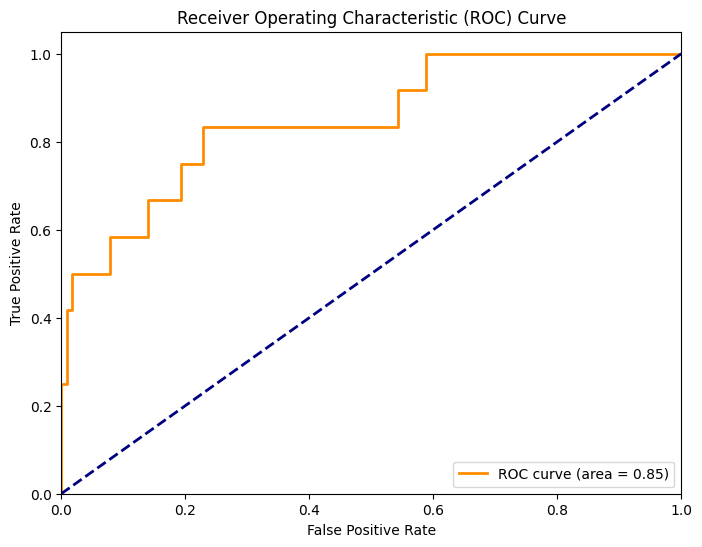

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming rf_model is your trained model and X_test, y_test are your test datasets
y_probs = lr_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Generate ROC curve values: false positive rates (fpr), true positive rates (tpr)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC
roc_auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## 2024 Predictions

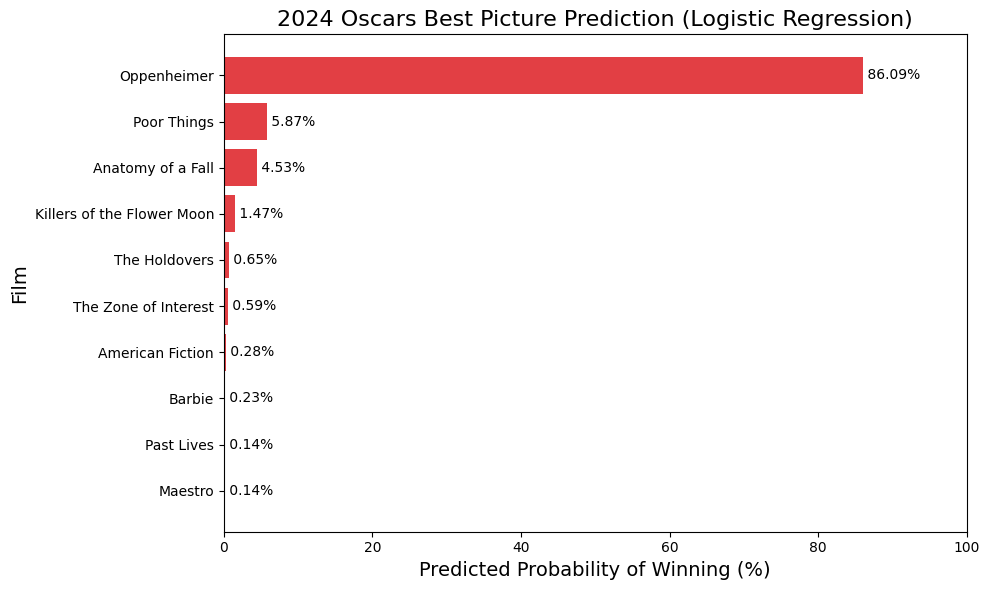

In [ ]:
pred = df_bp[df_bp["year_ceremony"] == 2024]

pred = pred[["total_noms", "genre_drama", "genre_war", "genre_musical", "genre_thriller", "genre_biography",
            "imdb_rating", "bafta_nom", "bafta_win", "gg_drama_nom", "gg_drama_win", "gg_comedy_nom", "gg_comedy_win",
            "pga_nom", "pga_win", "best_director_nom"]]
indices = pred.index

probabilities = lr_model.predict_proba(pred)

predictions_df = pd.DataFrame(probabilities, columns=["prob_not_win", "prob_win"])
predictions_df["prob_not_win"] = predictions_df["prob_not_win"] * 100
predictions_df["prob_win"] = predictions_df["prob_win"] * 100

predictions_df = pd.concat([df_bp.loc[indices, ["film"]].reset_index(drop=True), predictions_df], axis=1)

### Normalize

# Normalize the 'prob_win' values so they sum up to 100% within the year
total_prob_win = predictions_df['prob_win'].sum()

predictions_df['predicted_prob'] = (predictions_df['prob_win'] / total_prob_win) * 100

# Sort the DataFrame by 'predicted_prob' in descending order
predictions_df_sorted = predictions_df.sort_values(by='predicted_prob', ascending=True)

# Extract the sorted film names and their predicted probabilities
films_sorted = predictions_df_sorted['film']
predicted_probs_sorted = predictions_df_sorted['predicted_prob']

### Visual

# Creating the horizontal bar chart
plt.figure(figsize=(10, 6)) # Adjust the figure size as needed
# plt.barh(films_sorted, predicted_probs_sorted, color='#E23F44')
bars = plt.barh(films_sorted, predicted_probs_sorted, color='#E23F44')

plt.ylabel('Film', fontsize=14) # Label for the y-axis
plt.xlabel('Predicted Probability of Winning (%)', fontsize=14) # Label for the x-axis
plt.title('2024 Oscars Best Picture Prediction (Logistic Regression)', fontsize=16) # Title of the chart

plt.xlim(0, 100) # Set the x-axis to range from 0 to 100%

# Annotate each bar with the percentage value
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             ' {:.2f}%'.format(bar.get_width()),
             va='center', ha='left', fontsize=10)

# Display the chart
plt.tight_layout() # `Adjust layout to make room for the content
plt.show()